<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


### ***Name***: [*your name goes here*]
### ***CID***: [*your CID goes here*]

# Instructions:

Follow the instructions below to complete the coursework and submit it:

<br>

1. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine if it has a GPU and/or sufficient computational power). Your copy of the notebook should be named: `yourusername_coursework_I.ipynb`. And don't forget to fill in the two fields at the top of this notebook with your name and CID.

<br>

2. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link. Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, training graphs generated with `livelossplot`, etc). We will not rerun code blocks in the notebooks, it is your responsibility to run them before uploading the notebook.

   - Add comments in the code to explain what you are doing at every step. 

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but **you can add any coding or markdown blocks you need**.

<br>

3. The coursework is released on **Friday 9 December at 14:00h UK time**, and the answers have to be submitted on **Monday 12 December, 20:00h UK time**. We will not accept late submissions.

<br>

<br>

### The coursework consists of 5 questions you have to complete. You will find them below. 

- Questions 2 and 3 are very similar and you have to complete both of them, **you DO NOT have to choose one of them, you have to do them both.**

- You can use code seen in class, but indicate clearly when you do, and **make it clear (using comments or markdown blocks) what are your modifications**. This will influence your final marks.

- Your final marks will depend both on the quality of your results **AND** the justification, explanation and rationale of your implementations.

- Reference any publications and other materials that you use, but keep in mind that **your implementations should be original and not copied from any online resources (we will check for plagiarism)**. It is ok to use other resources to understand concepts and draw inspiration, but always reference them properly in the notebook.

- Finally, **justify your answers well, but focus on what the question is asking**. I will penalise lengthy answers that do not have any relation with the question being addressed.

<br>

---

<br>

## Imports

In [3]:
import torchvision
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda'

<br>

---

<br>

## **Q1** - Download and prepare the Fashion MNIST dataset [10 points]

Get the `FashionMNIST` dataset from `torchvision.datasets`

- Inspect the dataset and format the data as you see fit to use it in your next questions. Explain the process you follow.

- Plot a matrix of images with 10 examples of each class.

- Is the dataset well balanced (does it have similar number of samples for each class)? Generate and present data to support your answer in any form you see fit.

In [4]:


# Get the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True,
                                                  target_transform = transforms.Lambda(
    lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True,
                                                target_transform = transforms.Lambda(
    lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

# Apply transformations to the images and labels
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the images to tensors
    transforms.Normalize((0.5,), (0.5,)),  # Normalize the images
    transforms.RandomErasing()  # Add random noise
])

train_dataset.transform = transform
test_dataset.transform = transform

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
# Get the images and labels from the dataset
images, labels = train_dataset.data, train_dataset.targets

# Print the shape of the images and labels
print(f'images shape: {images.shape}')
print(f'labels shape: {labels.shape}')

images shape: torch.Size([60000, 28, 28])
labels shape: torch.Size([60000])


In [6]:
labels

tensor([9, 0, 0,  ..., 3, 0, 5])

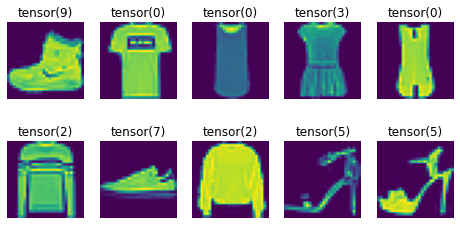

In [7]:
# Plot some images from the dataset
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i])
    axi.axis('off')
    axi.set_title(labels[i])

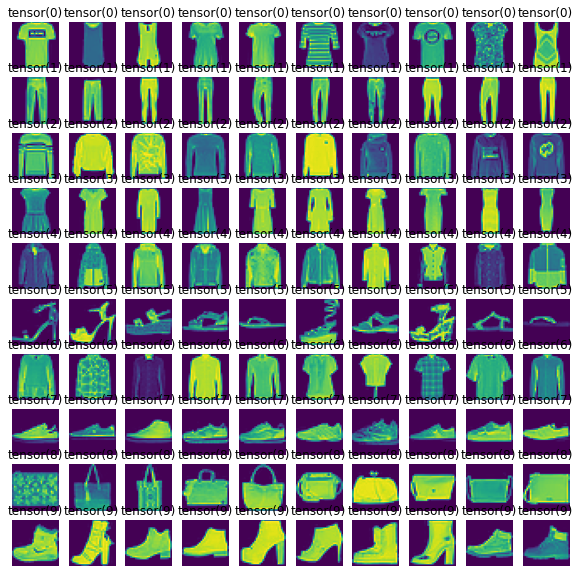

In [8]:
# Set the number of classes and examples per class
num_classes = 10
num_examples_per_class = 10

# Create a figure with a grid of subplots
fig, ax = plt.subplots(num_classes, num_examples_per_class, figsize=(10, 10))

# Iterate over the classes
for c in range(num_classes):
    # Select the images and labels that belong to this class
    images_c = images[np.where(labels == c)]
    labels_c = labels[np.where(labels == c)]

    # Iterate over the examples
    for i in range(num_examples_per_class):
        # Plot the image
        ax[c, i].imshow(images_c[i])
        ax[c, i].axis('off')
        ax[c, i].set_title(labels_c[i])

Text(0.5, 1.0, 'Number of samples per class')

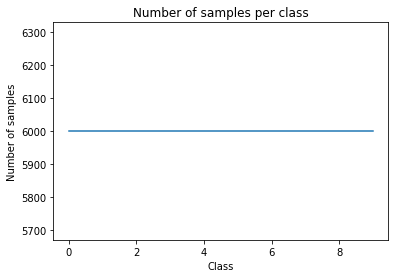

In [9]:
# Compute the number of samples for each training class
num_samples_per_class = [np.where(labels == c)[0].size for c in range(num_classes)]

# Plot a histogram of the number of samples per class
plt.plot(num_samples_per_class)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')

In [10]:
# Create a data loader for the training and validation sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(train_dataset, batch_size=2 * batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

<br>

---

<br>

## **Q2** - Implement a **conditional VAE** [25 points]

Implement a VAE similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your decoder, you have to tell it which class you want it to generate. <br> *During the lectures we created a VAE that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation 
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional VAE to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?

Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).



In [11]:
class CVAEEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim, conditional_dim):
        super(CVAEEncoder, self).__init__()
        
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.conditional_dim = conditional_dim
        
        # Encoder layers
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 7 * 7 + conditional_dim, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc31 = nn.Linear(64, latent_dim)  # mu layer
        self.fc32 = nn.Linear(64, latent_dim)  # logvariance layer


        # self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # self.fc1 = nn.Linear(3 * 3 * 64 + conditional_dim, latent_dim)
        # self.fc2 = nn.Linear(3 * 3 * 64 + conditional_dim, latent_dim)


        
    def forward(self, x, c):
        # Reshape the input image
        x = x.view(-1, 1, 28, 28)
        
        # Pass through the encoder layers
        h1 = self.pool(F.relu(self.conv1(x)))
        h2 = self.pool(F.relu(self.conv2(h1)))
        h2 = h2.view(-1, 16 * 7 * 7)
        
        # Concatenate the encoder hidden state and the conditional data
        h2c = torch.cat([h2, c], dim=1)
        
        # Pass through the fully-connected layers
        h3 = F.relu(self.fc1(h2c))
        h4 = F.relu(self.fc2(h3))
        mu = self.fc31(h4)
        logvar = self.fc32(h4)
        

        # x = F.relu(self.conv1(x))
        # x = F.max_pool2d(x, kernel_size=2, stride=2)
        # x = F.relu(self.conv2(x))
        # x = F.max_pool2d(x, kernel_size=2, stride=2)
        # x = x.view(x.size(0), -1)
        # x = torch.cat([x, c], dim=1)
        # mean = self.fc1(x)
        # logvar = self.fc2(x)


        return mu, logvar

class CVAEDecoder(nn.Module):
    def __init__(self, latent_dim, conditional_dim):
        super(CVAEDecoder, self).__init__()
        
        self.latent_dim = latent_dim
        self.conditional_dim = conditional_dim
        
        # Decoder layers
        self.fc4 = nn.Linear(latent_dim + conditional_dim, 64)
        self.fc5 = nn.Linear(64, 256)
        self.fc6 = nn.Linear(256, 16 * 7 * 7)
        self.conv3 = nn.ConvTranspose2d(16, 8, kernel_size=3, padding=1)
        self.upsample = nn.Upsample(scale_factor=2)
        self.conv4 = nn.ConvTranspose2d(8, 1, kernel_size=3, padding=1)
        
    def forward(self, z, c):
        # Concatenate the latent variables and the conditional data
        zc = torch.cat([z, c], dim=1)
        
        # Pass through the fully-connected layers
        h4 = F.relu(self.fc4(zc))
        h5 = F.relu(self.fc5(h4))
        h6 = F.relu(self.fc6(h5))
        h6 = h6.view(-1, 16, 7, 7)
        # print(h6.shape)
        
        # Pass through the transposed convolutional layers
        h7 = F.relu(self.conv3(self.upsample(h6)))
        # print(h7.shape)
        x_hat = torch.sigmoid(self.conv4(self.upsample(h7)))
        
        return x_hat

class CVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, conditional_dim):
        super(CVAE, self).__init__()
        
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.conditional_dim = conditional_dim
        
        # Define the encoder and decoder
        self.encoder = CVAEEncoder(input_dim, latent_dim, conditional_dim)
        self.decoder = CVAEDecoder(latent_dim, conditional_dim)
        
    def reparameterize(self, mu, logvar):
        # Sample the latent variables using the reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        
        return z
    
    def forward(self, x, c):
        mu, logvar = self.encoder(x, c)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decoder(z, c)
        
        return x_hat, mu, logvar

In [124]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(7 * 7 * 64, latent_dim)
        self.fc2 = nn.Linear(7 * 7 * 64, latent_dim)

    def forward(self, x, y):
        x = F.relu(self.conv1(x))

        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(x.size(0), -1)

        z_mean = self.fc1(x)
        z_logvar = self.fc2(x)
        return z_mean, z_logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.fc1 = nn.Linear(latent_dim + 10, 7 * 7 * 64)
        self.conv1 = nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, z, y):
        z = torch.cat((z, y), dim=-1)
        z = self.fc1(z)
        z = z.view(z.size(0), 64, 7, 7)
        z = F.relu(self.conv1(z))
        z = F.upsample(z, scale_factor=2)
        z = F.relu(self.conv2(z))
        z = F.upsample(z, scale_factor=2)
        return torch.sigmoid(z)

class CVAE(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def reparameterize(self, mu, logvar):
      # Sample the latent variables using the reparameterization trick
      std = torch.exp(0.5 * logvar)
      eps = torch.randn_like(std)
      z = mu + eps * std
      return z

    def forward(self, x, y):
        z_mean, z_logvar = self.encoder(x, y)
        z = self.reparameterize(z_mean, z_logvar)
        x_hat = self.decoder(z, y)
        return x_hat, z_mean, z_logvar

In [12]:
# Instantiate the CVAE
cvae = CVAE(input_dim=784, latent_dim=32, conditional_dim=10)
# cvae = CVAE(latent_dim=32)

# Set the CVAE to train mode
cvae.train()
x,c = next(iter(train_loader))
x_hat = cvae(x,c)
x_hat[0].shape

torch.Size([64, 1, 28, 28])

In [13]:
# Instantiate the CVAE
latent_dim = 32
cvae = CVAE(input_dim=784, latent_dim=latent_dim, conditional_dim=10)
# cvae = CVAE(latent_dim=32)
# Set the CVAE to train mode
cvae.train()

# Set the optimizer
optimizer = torch.optim.Adam(cvae.parameters())

# Set the number of epochs
num_epochs = 20

# Move the model, data, and optimizer to the GPU
cvae.cuda()

train_losses = []
val_losses = []

# Data Augementation
transformations = [transforms.RandomHorizontalFlip(), transforms.RandomRotation(10)]

# Combine the transformations into a single callable object
transform = torchvision.transforms.Compose(transformations)
# Train the CVAE
for epoch in range(num_epochs):
    # Set the train and validation losses for this epoch
    train_loss = 0
    val_loss = 0

    # Loop over the training data
    for x, c in train_loader:
        x_aug = transform(x)
        
        # Move the tensors to the GPU
        x_aug = x_aug.cuda()
        c = c.cuda()

        # Forward pass
        x_hat, mu, logvar = cvae(x_aug, c)

        # Compute the reconstruction loss
        recon_loss = F.mse_loss(x_hat, x_aug)

        # Compute the Kullback-Leibler divergence
        kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        # Compute the total loss
        loss = recon_loss + 10*kl_loss

        # Backward pass
        loss.backward()

        # Optimization step
        optimizer.step()
        optimizer.zero_grad()

        # Record the training loss
        train_loss += loss.item()
        
    # Loop over the validation data
    for x, c in val_loader:
        # Move the tensors to the GPU
        x = x.cuda()
        c = c.cuda()

        # Forward pass
        x_hat, mu, logvar = cvae(x, c)

        # Compute the reconstruction loss
        recon_loss = F.mse_loss(x_hat, x)

        # Compute the Kullback-Leibler divergence
        kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        # Compute the total loss
        loss = recon_loss + 0.01*kl_loss

        # Record the validation loss
        val_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))
    if (epoch+1) % 4 == 0:
    # Print or plot the training and validation losses
      print(f"Epoch {epoch}: train_loss = {train_losses[-1]},val_loss = {val_losses[-1]}")
    # plt.plot(train_losses)
    # plt.show()


Epoch 3: train_loss = 0.5992536036444626,val_loss = 0.6322950348416879
Epoch 7: train_loss = 0.5988429052743323,val_loss = 0.6325951998930242
Epoch 11: train_loss = 0.5993525995882844,val_loss = 0.6321114310577735
Epoch 15: train_loss = 0.5993057983135109,val_loss = 0.6327392235239432
Epoch 19: train_loss = 0.5844524232690522,val_loss = 0.6171044459475129


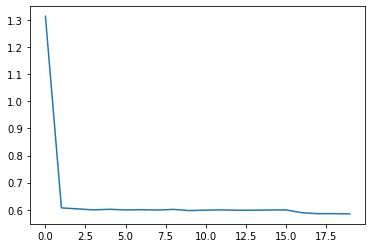

In [14]:
plt.plot(train_losses)
plt.show()

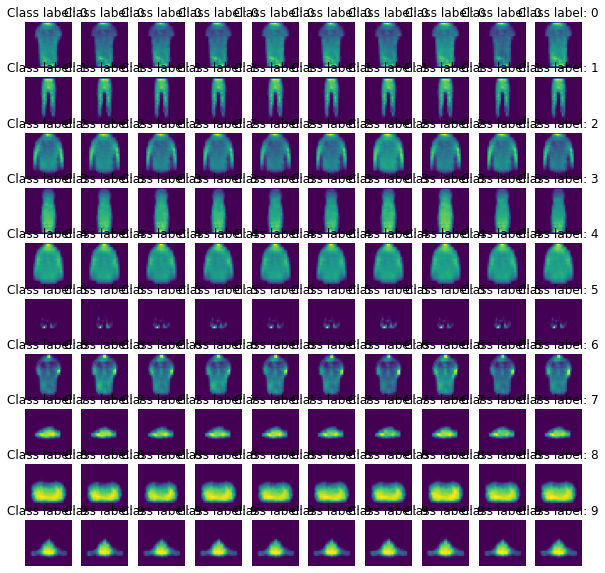

In [15]:
# Set the model in eval mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cvae.eval()

# Sample a tensor of latent variables from the prior distribution of the CVAE model
latent_z = torch.randn(num_classes * 10, 32)

# Create a tensor of class labels by concatenating one-hot encodings of the class labels
class_labels = torch.arange(num_classes).repeat(10)
one_hot_labels = F.one_hot(class_labels, num_classes).float()

latent_z = latent_z.to(device)
one_hot_labels = one_hot_labels.to(device)
# Use the `decode` method of the CVAE model to generate new samples
generated_samples = cvae.decoder(latent_z, one_hot_labels)

fig, ax = plt.subplots(num_classes, num_examples_per_class, figsize=(10, 10))

for c in range(num_classes):
    # Select the images and labels that belong to this class
    # images_c = images[np.where(labels == c)]
    # labels_c = labels[np.where(labels == c)]

    # Iterate over the examples
    for i in range(num_examples_per_class):
        # Plot the image
        ax[c, i].imshow(generated_samples[i * 10 +c].cpu().detach().squeeze())
        ax[c, i].axis('off')
        ax[c, i].set_title(f'Class label: {c}')


# # Plot the generated samples using the class labels as the titles of the plots
# for i in range(num_classes):
#     plt.figure()
#     plt.imshow(generated_samples[i * 10].cpu().detach().squeeze())
#     plt.title(f'Class label: {i}')
#     plt.show()


<br>

---

<br>

## **Q3** - Implement a **conditional GAN** that generates a user-defined class [25 points]

Implement a GANs similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your generator, you have to tell it which class you want it to generate. <br> *During the lectures we created a GAN that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional GAN to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?
  - Would they be different from your choices in **Q2**?


Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).

In [ ]:
# your code here (add as many code blocks as you need)

text block for your answers

In [ ]:
# you can reuse material from class, but explain very well modifications in the code and why you did them

text block for your answers

<br>

---

<br>

## **Q4** - Analysis and comparison of results [20 points]

Analyse and compare the results you have obtained with the two networks above.

- Use the data you generated training the three networks above to discuss the results you have generated in **Q2** and **Q3**.
- Is there a network that performs better than the other? Why do you think that is?
- What could you do to improve your results on each of the networks you have implemented? ***\[limit your answer to this question to 150 words\]***

**IMPORTANT NOTE**: even if you did not complete **Q2** and **Q3**, make sure to include a discussion with any partial results or other considerations regarding the performance of your implemented methods.

text block for your answers

<br>

---

<br>

## **Q5** - Modify your dataset to create data imbalance and retrain **one** of your conditional models [20 points]

Modify the `FashionMNIST` dataset to eliminate 90% of the images corresponding to one of the classes in the dataset (whichever you want).

Now, **choose one of the two questions below (a or b)**:

- **Q5-a) Retrain your conditional VAE from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- **Q5-b) Retrain your conditional GAN from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- Compare the results of this new images generated with the modified dataset with the original results from questions **Q2** or **Q3** (depending of whether you have chosen **Q5-a** or **Q5-b**). What do you observe? Describe your interpretation of this comparison.

In [ ]:
# your code here (add as many code blocks as you need)

text block for your answers

In [ ]:
### your code here, if you need any (add as many code blocks as you need)

text block for your answers